In [1]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "gensim"])

KeyboardInterrupt: 

In [1]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "gensim==4.3.2"])

CalledProcessError: Command '['C:\\Users\\Lenovo\\AppData\\Local\\Python\\pythoncore-3.14-64\\python.exe', '-m', 'pip', 'install', 'gensim==4.3.2']' returned non-zero exit status 1.

In [ ]:
from gensim.models import Word2Vec

# Example small corpus (you can replace with your SMS clean text later)
sentences = [
    "king queen prince princess royal palace".split(),
    "man woman boy girl family".split(),
    "computer software hardware ai data science".split(),
    "mobile phone call text message free prize win".split(),
    "love happy good day smile enjoy".split(),
]

w2v = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=1,
    workers=1,
    sg=1
)

In [2]:
w2v.wv.most_similar("king", topn=5)

NameError: name 'w2v' is not defined

In [3]:
from gensim.models import Word2Vec

sentences = [
    "king queen prince princess royal palace".split(),
    "man woman boy girl family".split(),
    "computer software hardware ai data science".split(),
    "mobile phone call text message free prize win".split(),
    "love happy good day smile enjoy".split(),
]

w2v = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=1,
    workers=1,
    sg=1
)

print("Word2Vec model created:", w2v)

ModuleNotFoundError: No module named 'gensim'

In [ ]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "gensim==4.3.2", "--no-cache-dir"])

In [1]:
from gensim.models import Word2Vec

ModuleNotFoundError: No module named 'gensim'

In [2]:
sentences = [
    "king queen prince princess royal palace",
    "man woman boy girl family",
    "computer software hardware ai data science",
    "mobile phone call text message free prize win",
    "love happy good day smile enjoy"
]

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(analyzer="word")
X = vectorizer.fit_transform(sentences)

vocab = vectorizer.get_feature_names_out()
word_to_vec = {}

# build a vector for each word by averaging sentence vectors where it appears
for i, sent in enumerate(sentences):
    for w in sent.split():
        if w not in word_to_vec:
            word_to_vec[w] = []
        word_to_vec[w].append(X[i].toarray()[0])

word_to_vec = {w: np.mean(vs, axis=0) for w, vs in word_to_vec.items()}

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

def most_similar_word(word, topn=5):
    if word not in word_to_vec:
        return []
    wv = word_to_vec[word].reshape(1, -1)
    sims = []
    for other, vec in word_to_vec.items():
        if other == word:
            continue
        sim = cosine_similarity(wv, vec.reshape(1, -1))[0][0]
        sims.append((other, float(sim)))
    sims.sort(key=lambda x: x[1], reverse=True)
    return sims[:topn]

most_similar_word("king", topn=5)

[('queen', 0.9999999999999999),
 ('prince', 0.9999999999999999),
 ('princess', 0.9999999999999999),
 ('royal', 0.9999999999999999),
 ('palace', 0.9999999999999999)]

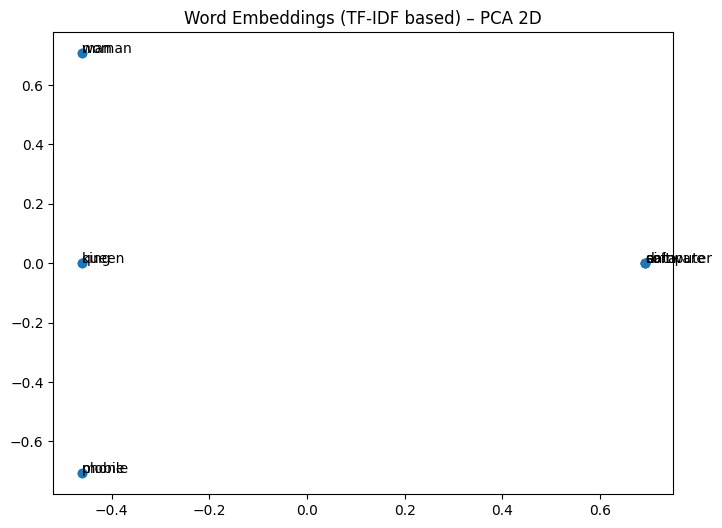

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = ["king","queen","man","woman","computer","software","ai","data","mobile","phone"]
vectors = [word_to_vec[w] for w in words if w in word_to_vec]
labels = [w for w in words if w in word_to_vec]

pca = PCA(n_components=2)
X2 = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
plt.scatter(X2[:,0], X2[:,1])

for i, w in enumerate(labels):
    plt.annotate(w, (X2[i,0], X2[i,1]))

plt.title("Word Embeddings (TF-IDF based) – PCA 2D")
plt.show()

In [6]:
%pip install adjustText

Note: you may need to restart the kernel to use updated packages.


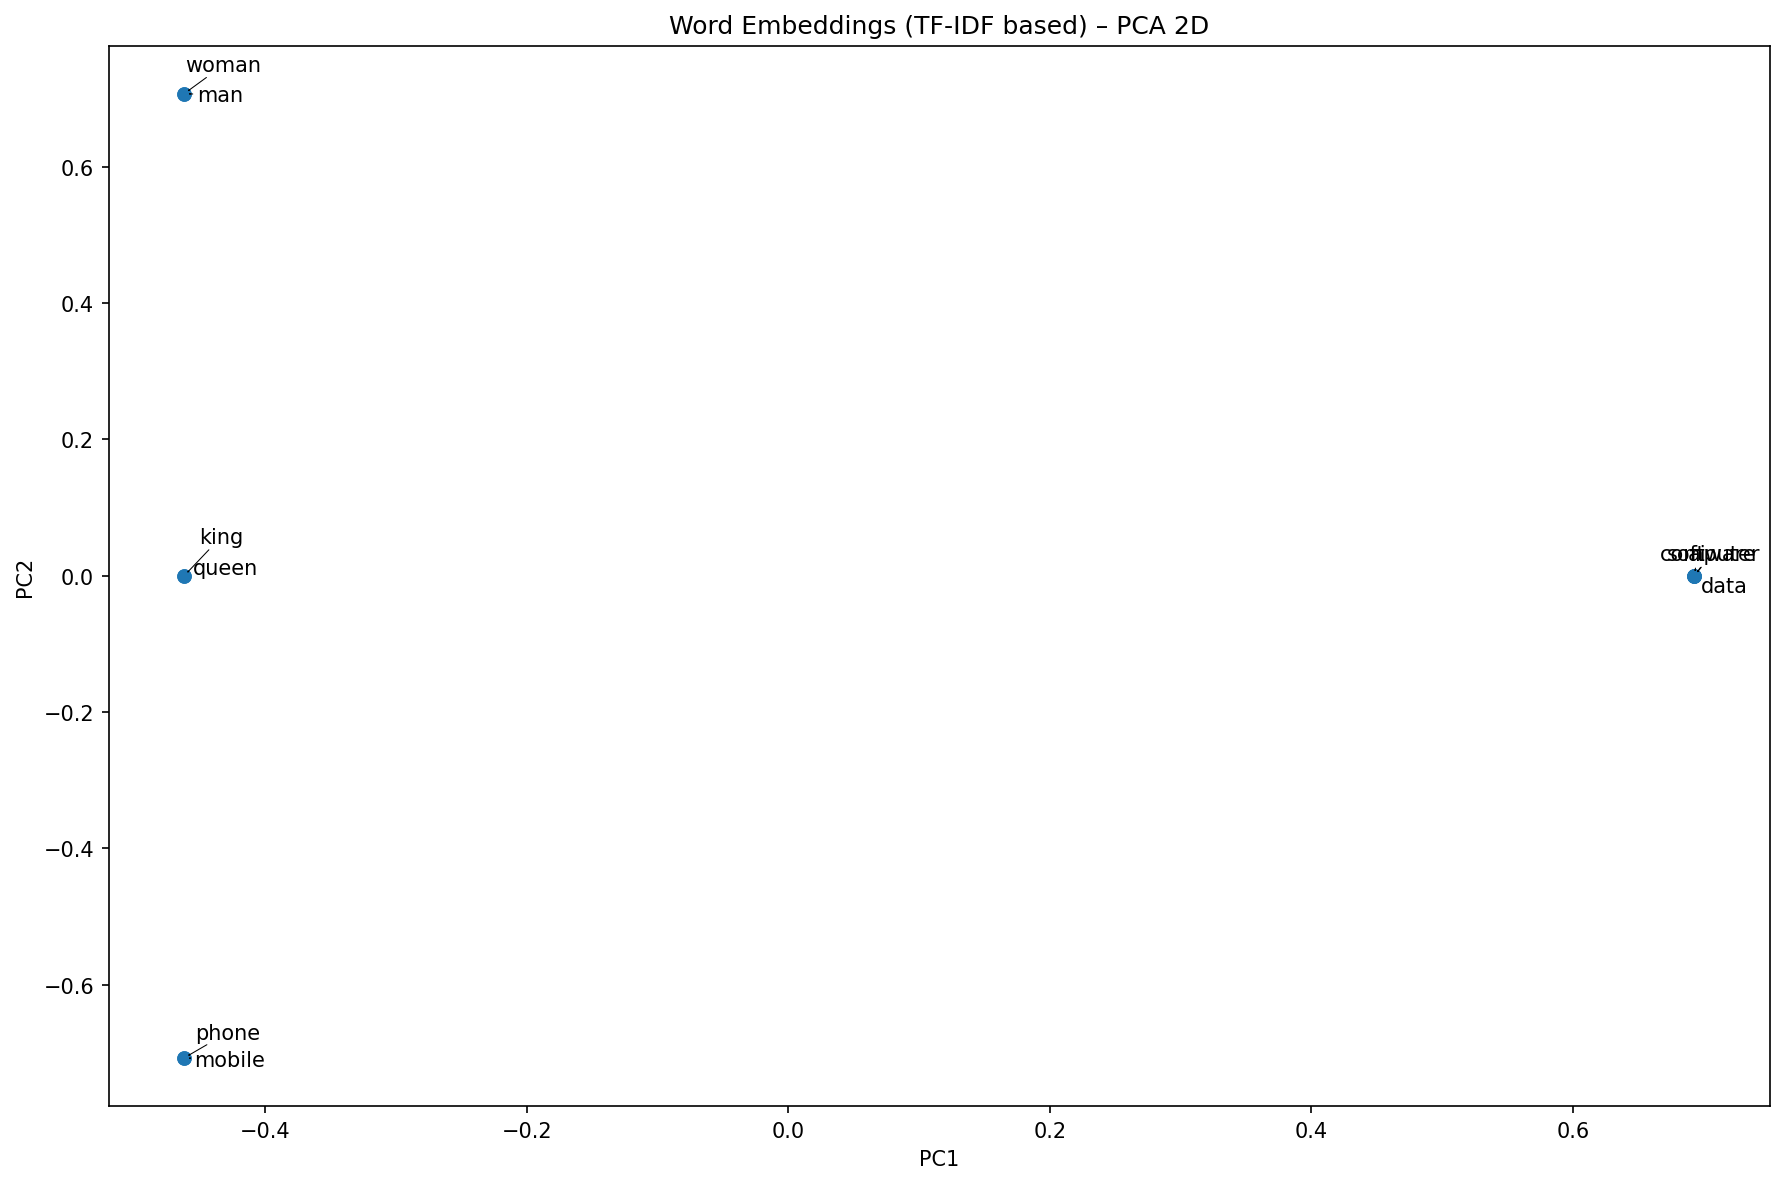

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from adjustText import adjust_text

words = ["king","queen","man","woman","computer","software","ai","data","mobile","phone"]
vectors = [word_to_vec[w] for w in words if w in word_to_vec]
labels = [w for w in words if w in word_to_vec]

pca = PCA(n_components=2)
X2 = pca.fit_transform(vectors)

plt.figure(figsize=(12, 8), dpi=150)
plt.scatter(X2[:,0], X2[:,1])

texts = []
for i, w in enumerate(labels):
    texts.append(plt.text(X2[i,0], X2[i,1], w, fontsize=10))

adjust_text(texts, arrowprops=dict(arrowstyle="->", lw=0.5))
plt.title("Word Embeddings (TF-IDF based) – PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()